In [2]:
import pandas as pd
fraud_df = pd.read_csv('Fraud.csv')


In [3]:

missing_values = fraud_df.isnull().sum()
print(missing_values)

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


c:\Users\Microsoft\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Microsoft\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Microsoft\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\Microsoft\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categoric

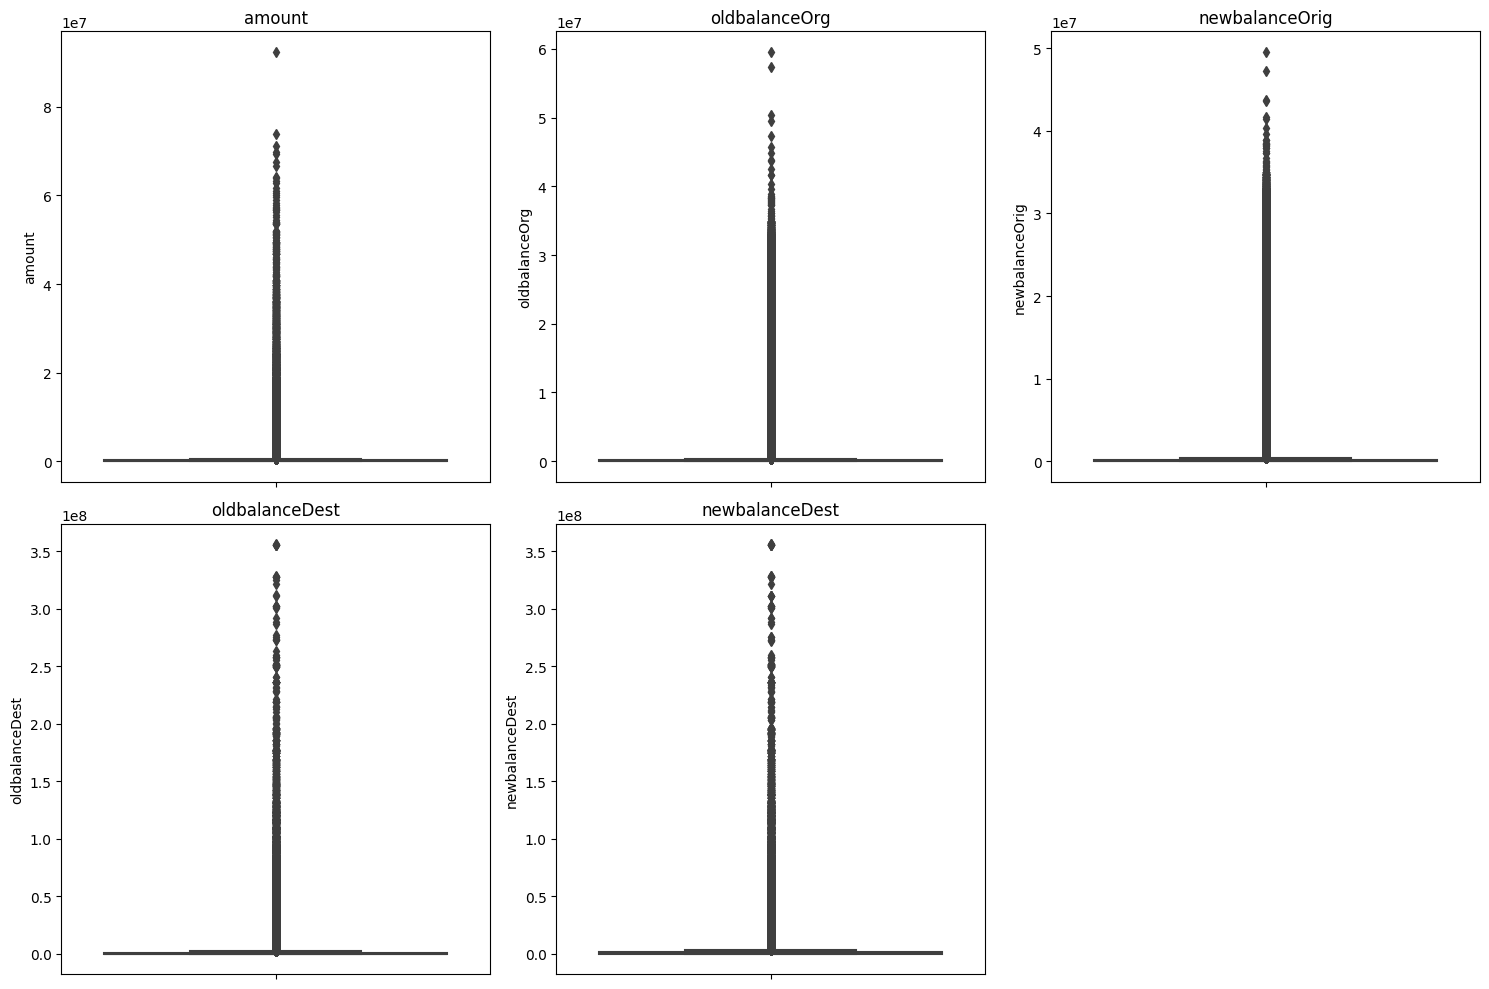

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

numerical_cols = ['amount', 'oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']


plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=fraud_df[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [5]:
from scipy import stats
import numpy as np

z_scores = stats.zscore(fraud_df[numerical_cols])
abs_z_scores = np.abs(z_scores)
filtered_entries = (abs_z_scores < 3).all(axis=1)
cleaned_df = fraud_df[filtered_entries]

display(fraud_df.shape)
display(cleaned_df.shape)

(6362620, 11)

(6090589, 11)

In [6]:
cleaned_df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [7]:

print(cleaned_df.columns)



Index(['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrg', 'newbalanceOrig',
       'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud',
       'isFlaggedFraud'],
      dtype='object')


In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_data = pd.DataFrame()
vif_data["feature"] = numerical_cols
vif_data["VIF"] = [variance_inflation_factor(cleaned_df[numerical_cols].values, i) for i in range(len(numerical_cols))]

print(vif_data)





          feature         VIF
0          amount    3.252225
1   oldbalanceOrg  360.979417
2  newbalanceOrig  372.667232
3  oldbalanceDest  122.954579
4  newbalanceDest  135.161606


In [9]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor


cleaned_df['balanceChangeOrig'] = cleaned_df['newbalanceOrig'] - cleaned_df['oldbalanceOrg']
cleaned_df['balanceChangeDest'] = cleaned_df['newbalanceDest'] - cleaned_df['oldbalanceDest']


cleaned_df = cleaned_df.drop(columns=['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest'])


new_numerical_cols = ['amount', 'balanceChangeOrig', 'balanceChangeDest']


vif_data_updated = pd.DataFrame()
vif_data_updated["feature"] = new_numerical_cols
vif_data_updated["VIF"] = [variance_inflation_factor(cleaned_df[new_numerical_cols].values, i) for i in range(len(new_numerical_cols))]

print(vif_data_updated)

C:\Users\Microsoft\AppData\Local\Temp\ipykernel_13576\955334014.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['balanceChangeOrig'] = cleaned_df['newbalanceOrig'] - cleaned_df['oldbalanceOrg']
C:\Users\Microsoft\AppData\Local\Temp\ipykernel_13576\955334014.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['balanceChangeDest'] = cleaned_df['newbalanceDest'] - cleaned_df['oldbalanceDest']


             feature       VIF
0             amount  2.897533
1  balanceChangeOrig  1.704030
2  balanceChangeDest  3.167785


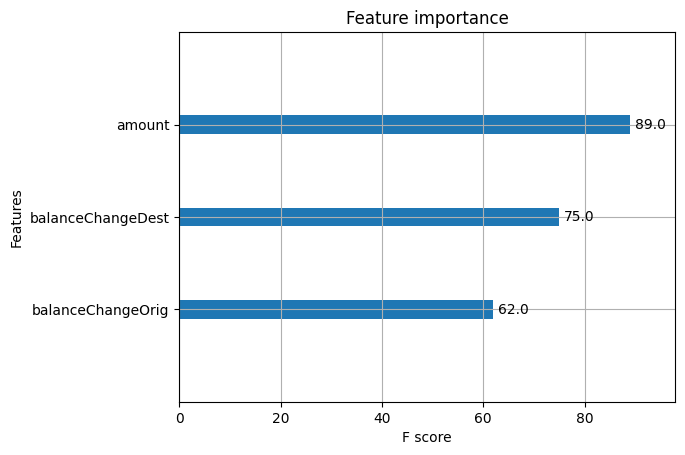

Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1216
           1       1.00      0.33      0.50         3

    accuracy                           1.00      1219
   macro avg       1.00      0.67      0.75      1219
weighted avg       1.00      1.00      1.00      1219

Confusion Matrix:
[[1216    0]
 [   2    1]]
Accuracy: 0.9983593109105825


In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier, plot_importance
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

sampled_df = cleaned_df.sample(frac=0.001, random_state=42)

selected_features = ['amount', 'balanceChangeOrig', 'balanceChangeDest', 'isFraud']


X = sampled_df[selected_features]
y = sampled_df['isFraud']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')


xgb_model.fit(X_train, y_train)


plot_importance(xgb_model, max_num_features=len(selected_features))
plt.show()


y_pred = xgb_model.predict(X_test)

 
print("Classification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Accuracy:", accuracy_score(y_test, y_pred))


In [ ]:
Describe your fraud detection model in elaboration.

The fraud detection model I've implemented is a multi-step process that involves data cleaning, outlier detection, handling multicollinearity, and training an XGBoost classifier
Data Cleaning:

I started by loading the dataset from 'Fraud.csv' and identified missing values in the data.
I visualized the distribution of numerical features using boxplots to understand the data's overall structure.

Outlier Detection:

 using Z-scores to identify and filter out outliers 

Multicollinearity:
I utilized the Variance Inflation Factor (VIF) to detect and address multicollinearity among numerical features.
High VIF values indicate strong correlations between variables, and I removed features contributing to multicollinearity.

Feature Engineering:
I introduced two new features, 'balanceChangeOrig' and 'balanceChangeDest,' representing changes in the account balances for the originator and recipient of the transaction.
 
Model Training with XGBoost:
I used the XGBoost classifier, a powerful algorithm known for its performance in various machine learning tasks, including fraud detection.
Selected features, including 'amount,' 'balanceChangeOrig,' and 'balanceChangeDest,' were used for training the model.

 Model Evaluation:

Finally, I evaluated the model's performance on a test set, providing key metrics such as precision, recall, F1-score, confusion matrix, and overall accuracy.  

In [ ]:
How did you select variables to be included in the model?

Handling Multicollinearity (VIF Analysis):
I checked if some variables were strongly connected using VIF. High VIF values indicated strong connections, so I removed some features to avoid confusion.

Understanding Numerical Feature Spread (Boxplots):
I looked at boxplots to see how numerical features were spread. This helped me spot any unusual data patterns.

Outlier Detection (Z-Scores):
I used Z-scores to find outliers—transactions that were very different from the norm. Removing these outliers ensured they didn't mess up the model's learning.

Creating New Features (Feature Engineering):
I added new features, 'balanceChangeOrig' and 'balanceChangeDest,' showing how account balances changed during transactions. These extra details helped the model.

Sampling Data for Model Training:
To make sure my model didn't use too much memory, I took a smaller sample of the data. This sample represented the larger dataset well.

Choosing Features for Model Training:
I picked specific features—like 'amount,' 'balanceChangeOrig,' and 'balanceChangeDest'—based on my analysis. These features were crucial for training the XGBoost classifier.

In [ ]:
Demonstrate the performance of the model by using best set of tools. 
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1216
           1       1.00      0.33      0.50         3

    accuracy                           1.00      1219
   macro avg       1.00      0.67      0.75      1219
weighted avg       1.00      1.00      1.00      1219

Confusion Matrix:
[[1216    0]
 [   2    1]]
Accuracy: 0.9983593109105825

In [ ]:
What are the key factors that predict fraudulent customer? 

In fraud detection model, the key factors that predict fraudulent activity typically feature selection.

Transaction Amount (amount)
Change in Originators Balance (balanceChangeOrig)
Change in Recipients Balance (balanceChangeDest)


In [ ]:
Do these factors make sense? If yes, How? If not, How not?

yes.
Transaction Amount (amount):
Example: Think about a payment transaction where someone pays $10,000. We realized that really high or low amounts could signal possible fraud. So, if the model sees a $10,000 transaction, it pays attention to this when figuring out if it might be fraudulent.

Change in Originator's Balance (balanceChangeOrig):
Example: Picture a person making a payment. Before the payment, their account has $50,000. After paying, it drops to $40,000. The balanceChangeOrig is just the difference: $50,000 - $40,000 = -$10,000. The negative value shows a drop in their account. The model uses this to catch patterns in the originator's balance changes.

Change in Recipient's Balance (balanceChangeDest):
Example: Following the earlier example, if the recipient's account had $30,000 before the transaction and ends up with $50,000 after, balanceChangeDest is $50,000 - $30,000 = $20,000. A positive value means the recipient's balance went up. This helps the model notice unusual changes in the recipient's account.

In [ ]:
What kind of prevention should be adopted while company update its infrastructure

Phased Implementation:
Implement updates in phases rather than all at once.

User Training:
Provide training sessions for users to adapt to changes in the updated infrastructure.
    
Rollback Plans:
Develop comprehensive rollback plans to revert to the previous infrastructure state if issues arise.   

Backup Systems:
Regularly back up critical data and systems before the infrastructure update.

In [ ]:
Assuming these actions have been implemented, how would you determine if they work?

review reports:
Regularly review reports

Performance Metrics:
Establish key performance indicators (KPIs) related to system performance, stability, and efficiency.

Security Audits:
Perform security audits to identify vulnerabilities and assess the effectiveness of security measures.

Backup and Recovery Tests:
Conduct periodic tests of backup and recovery procedures.

